In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [2]:
# load data
with open("songs_db.json") as f:
    songs_db = json.load(f)

print(f"Data was updated on {songs_db['latest_ts']}")
print("Dict keys=", list(songs_db.keys()))

Data was updated on 2022-11-01T05:29:37+0000
Dict keys= ['songs_dic', 'broken_ts_list', 'latest_ts']


In [3]:
# create datafram
df = pd.DataFrame.from_dict(songs_db['songs_dic'], orient='index')
df.reset_index(level=0, inplace=True)
df.columns = ['time','name']
df['time'] = pd.to_datetime(df.time)
df = df.sort_values('time').reset_index(drop=True)

df.tail()

,time,name
1318460,2022-11-01 05:12:56+00:00,Danny Elfman - Oogie Boogie's Song (Jack O' Mi...
1318461,2022-11-01 05:18:26+00:00,JackG - Grim Grinning Ghosts (JackG Remix)
1318462,2022-11-01 05:21:28+00:00,Boris Karloff - Monster Mash
1318463,2022-11-01 05:24:28+00:00,Andrew Gold - It Must Be Halloween
1318464,2022-11-01 05:29:37+00:00,まめこ - MONSTER CANDY FACTORY


<AxesSubplot: >

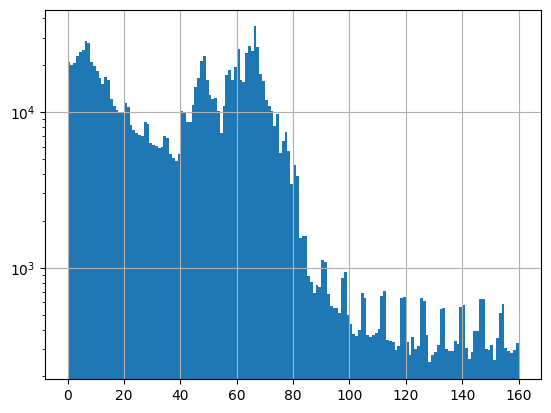

In [10]:
df['last_played'] = df.groupby('name').time.diff().dt.total_seconds().div(3600*24)

df['last_played'].hist(range=(0,160),log=True,bins=160)

<AxesSubplot: xlabel='time'>

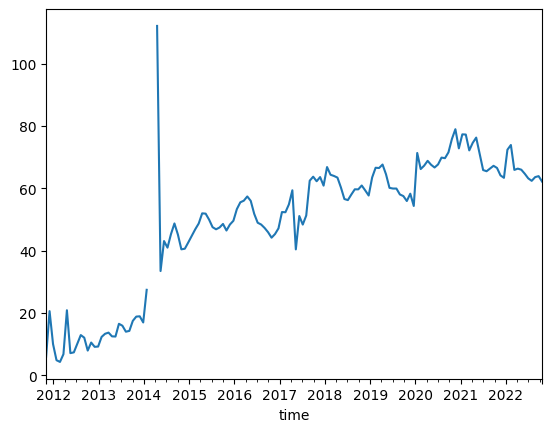

In [16]:
df.groupby(pd.Grouper(key='time',freq='28 d')).last_played.median().plot()